In [1]:
cd ..

/home/hyunjun/workspace/execution


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from agent import Agent

In [3]:
data = lambda seed : pd.read_csv(f'result/DeulingDQN/seed{seed}/sell_money.csv', index_col=0)

sell_moneys_ma = [data(seed)['sell_money'].rolling(100).mean().values.reshape(-1,1) for seed in range(1, 6)]
sell_moneys_ma = np.concatenate(sell_moneys_ma, axis=-1)
sell_moneys_ma_mean = np.mean(sell_moneys_ma, axis=-1)
sell_moneys_ma_std = np.std(sell_moneys_ma, axis=-1)

In [4]:
sell_moneys = [data(seed)['sell_money'].values.reshape(-1,1) for seed in range(1, 6)]
sell_moneys = np.concatenate(sell_moneys, axis=-1)
sell_moneys_mean = np.mean(sell_moneys, axis=-1)
sell_moneys_std = np.std(sell_moneys, axis=-1)

In [93]:
data2 = lambda seed : pd.read_csv(f'result/seed{seed}/sell_money.csv', index_col=0)

sell_moneys_dqn = data2(1)['sell_money'].rolling(100).mean().values.reshape(-1,1)
sell_moneys_10 = data2(2)['sell_money'].rolling(100).mean().values.reshape(-1,1)

In [105]:
data2 = lambda seed : pd.read_csv(f'result/seed{seed}/sell_money.csv', index_col=0)

sell_moneys_ma_10 = [data2(seed)['sell_money'].rolling(100).mean().values.reshape(-1,1) for seed in range(1, 6)]
sell_moneys_ma_10 = np.concatenate(sell_moneys_ma_10, axis=-1)
sell_moneys_ma_mean_10 = np.mean(sell_moneys_ma_10, axis=-1)
sell_moneys_ma_std_10 = np.std(sell_moneys_ma_10, axis=-1)

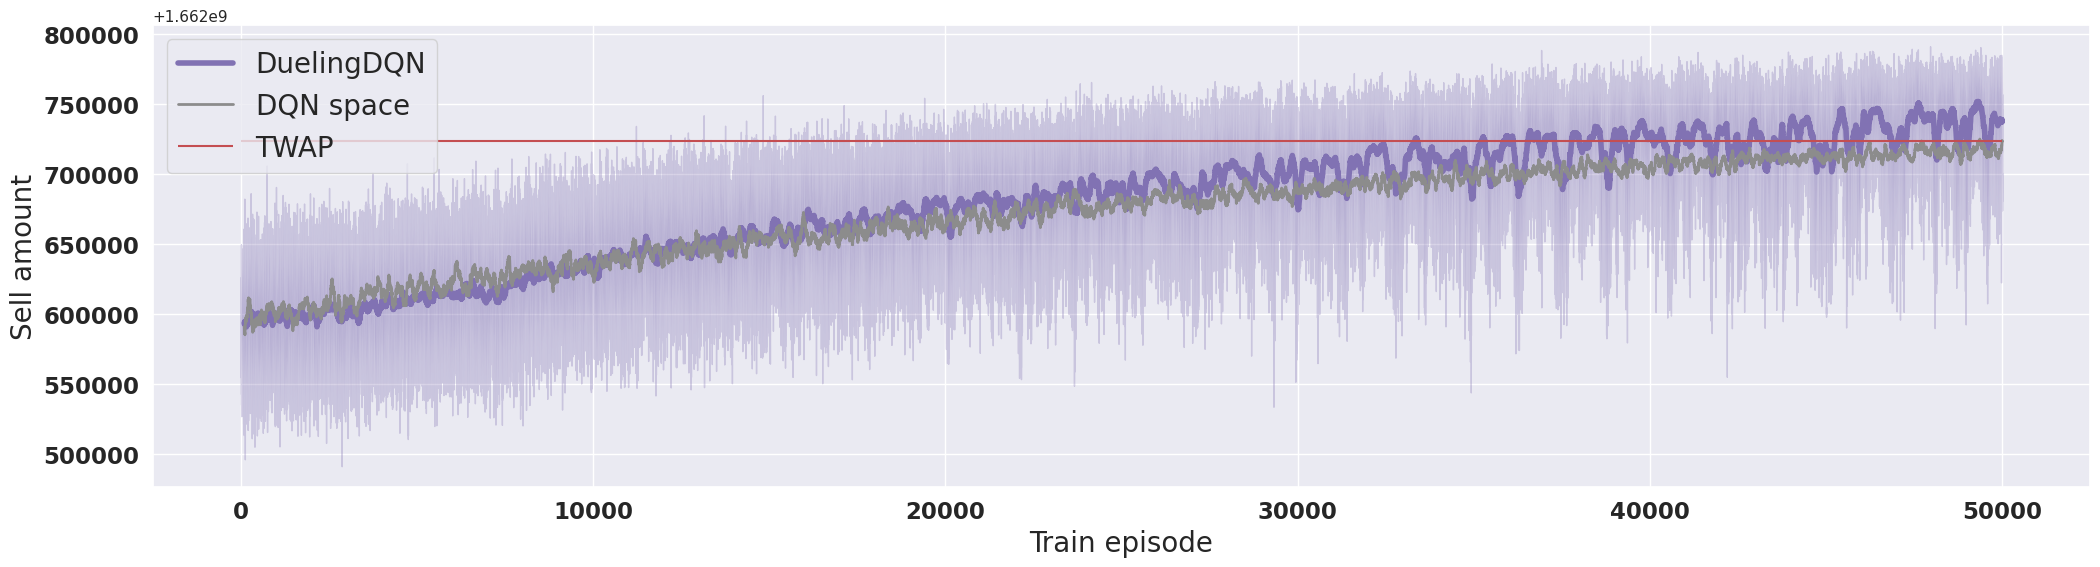

In [69]:
linewidth = 4.0
beta = 0.5

sns.set(style='darkgrid')
plt.figure(figsize=(25, 6))
plt.rc('legend', fontsize=20)

plt.xlabel('Train episode', fontsize=20)
plt.ylabel('Sell amount',fontsize=20)

plt.xticks(weight='bold', fontsize=16.5)
plt.yticks(weight='bold', fontsize=16.5)

plt.plot(sell_moneys_ma_mean, color="C4", linewidth=linewidth, label='DuelingDQN')
plt.plot(sell_moneys_dqn, color="C7", linewidth=2.0, label='DQN space')

plt.fill_between(x=np.arange(sell_moneys_ma_mean.shape[0]), 
                y1=sell_moneys_mean + beta*sell_moneys_std, 
                y2=sell_moneys_mean - beta*sell_moneys_std, 
                alpha=0.3, color="C4")

plt.hlines(y=1662723694.4188201, color='C3', xmin=0, xmax=50000, label='TWAP')
plt.legend()

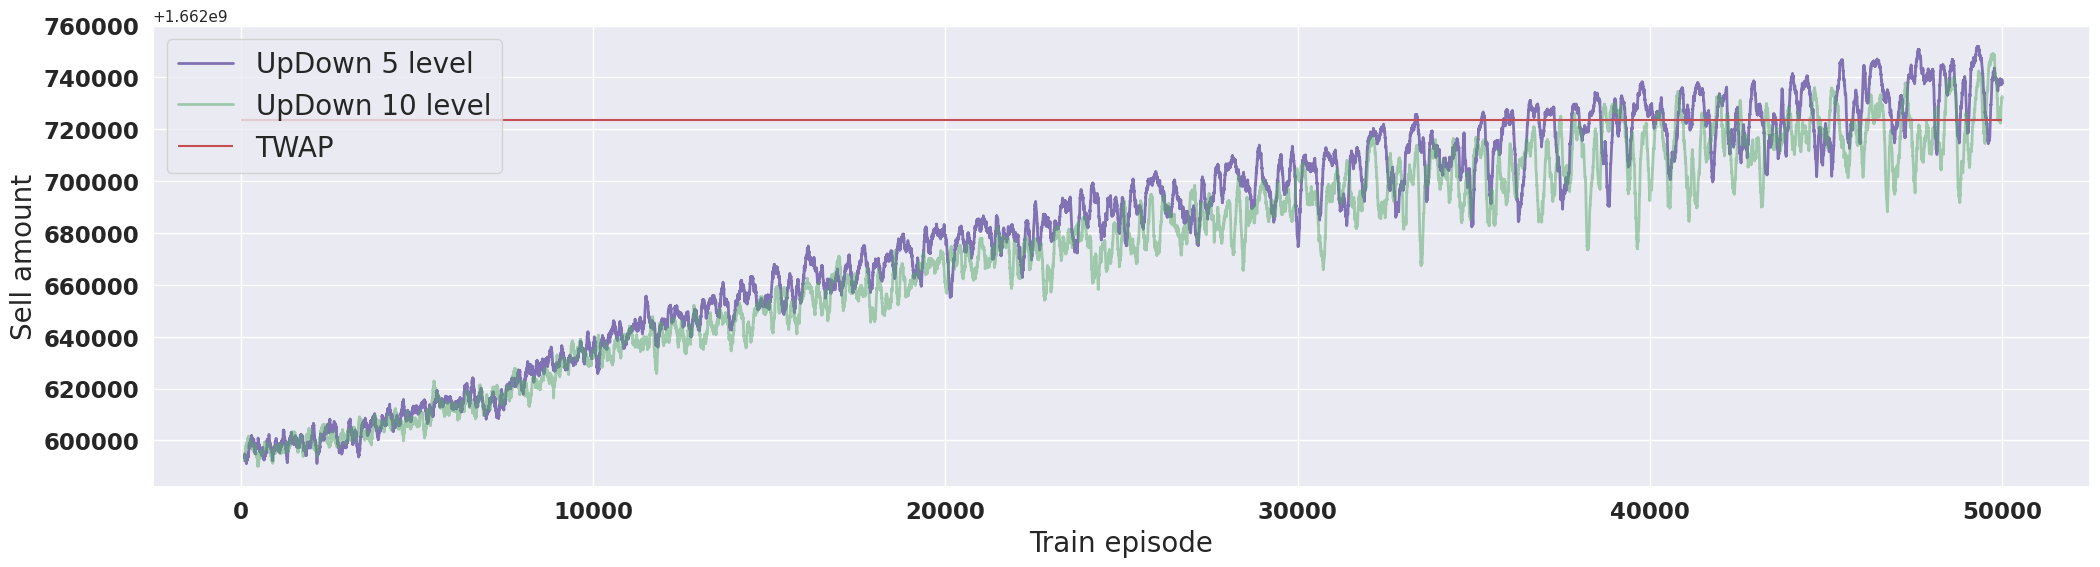

In [106]:
linewidth = 1.5
beta = 0.5

sns.set(style='darkgrid')
plt.figure(figsize=(25, 6))
plt.rc('legend', fontsize=20)

plt.xlabel('Train episode', fontsize=20)
plt.ylabel('Sell amount',fontsize=20)

plt.xticks(weight='bold', fontsize=16.5)
plt.yticks(weight='bold', fontsize=16.5)

plt.plot(sell_moneys_ma_mean, color="C4", linewidth=2.0, label='UpDown 5 level')
plt.plot(sell_moneys_ma_mean_10, color="C2", linewidth=2.0, alpha=0.5, label='UpDown 10 level')

plt.hlines(y=1662723694.4188201, color='C3', xmin=0, xmax=50000, label='TWAP')
plt.legend()

In [23]:
bm = [1706471622.6867244,
      1716303588.9404185,
      1785272438.464297]

rl = [1716439477.3340876,
      1785361790.500948,
      1785361790.500948]

In [29]:
100*((rl[0] - bm[0]) / bm[0]), 100*((rl[1] - bm[1]) / bm[1]), 100*((rl[2] - bm[2]) / bm[2])

(0.5841207386542691, 4.023658868135527, 0.0050049524501569785)

<BarContainer object of 3 artists>

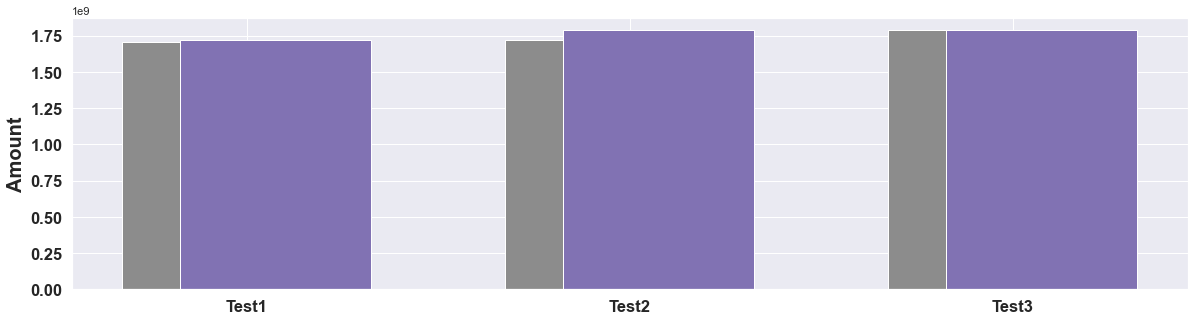

In [46]:
w = 0.5

plt.figure(figsize=(20,5))
plt.xticks(ticks=np.arange(1,4)+0.15/2, labels=['Test1', 'Test2', 'Test3'], weight='bold', fontsize=16.5)
plt.yticks(weight='bold', fontsize=16.5)
plt.ylabel('Amount', weight='bold', fontsize=20)

plt.bar(x=np.arange(1,4), height=bm, width=w, color='C7', label='TWAP')
plt.bar(x=np.arange(1,4)+0.15, height=rl, width=w, color='C4', label='Agent')